In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

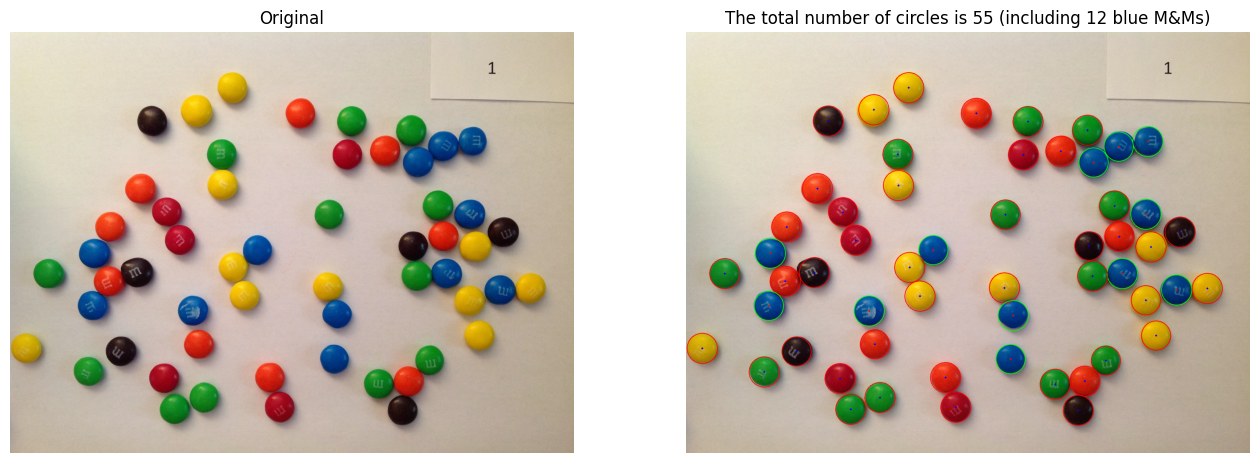

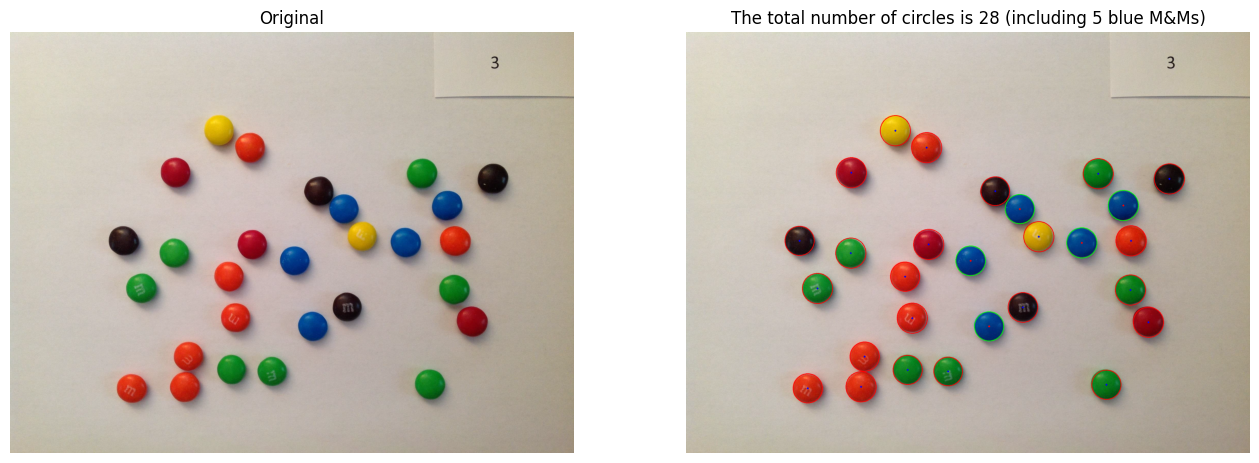

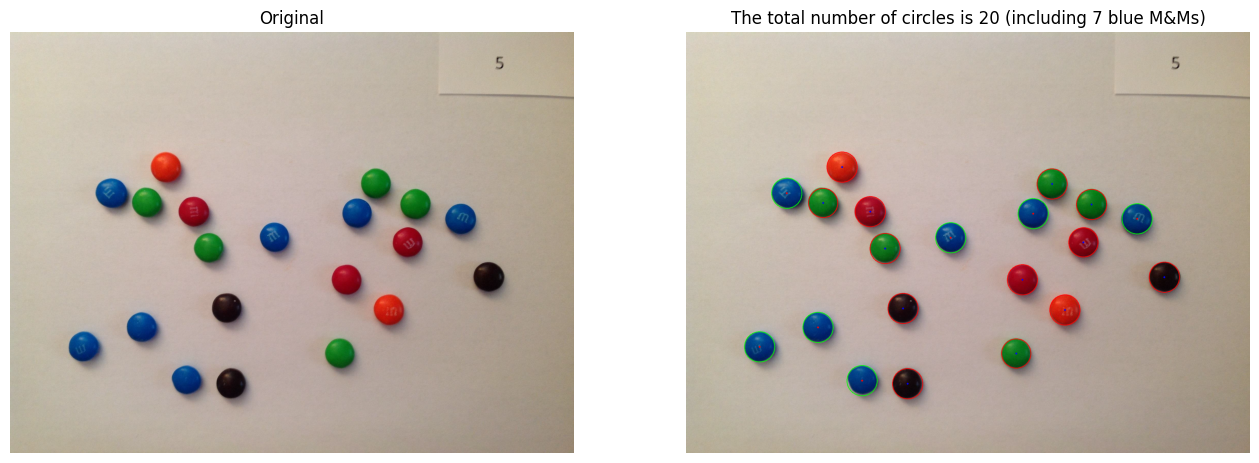

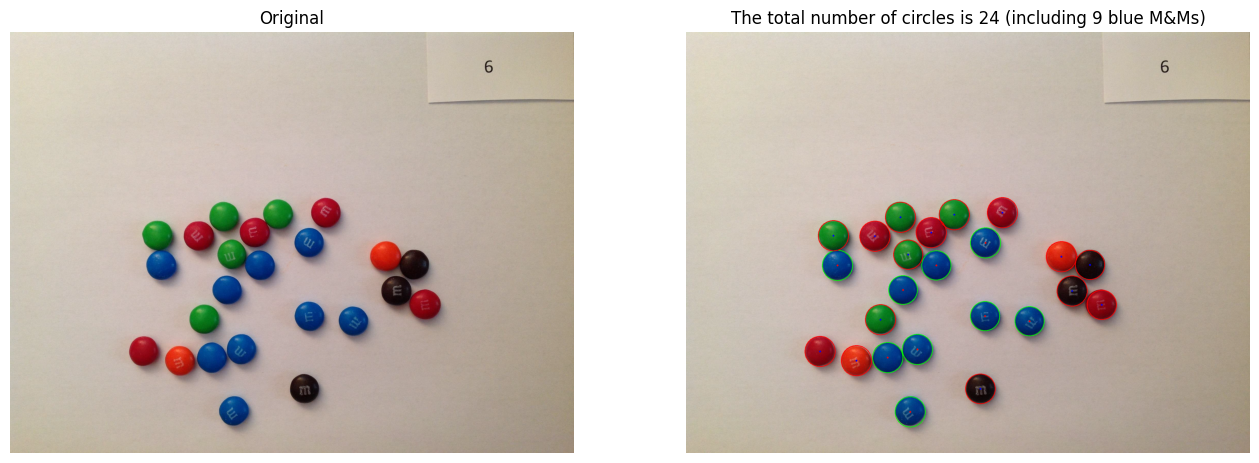

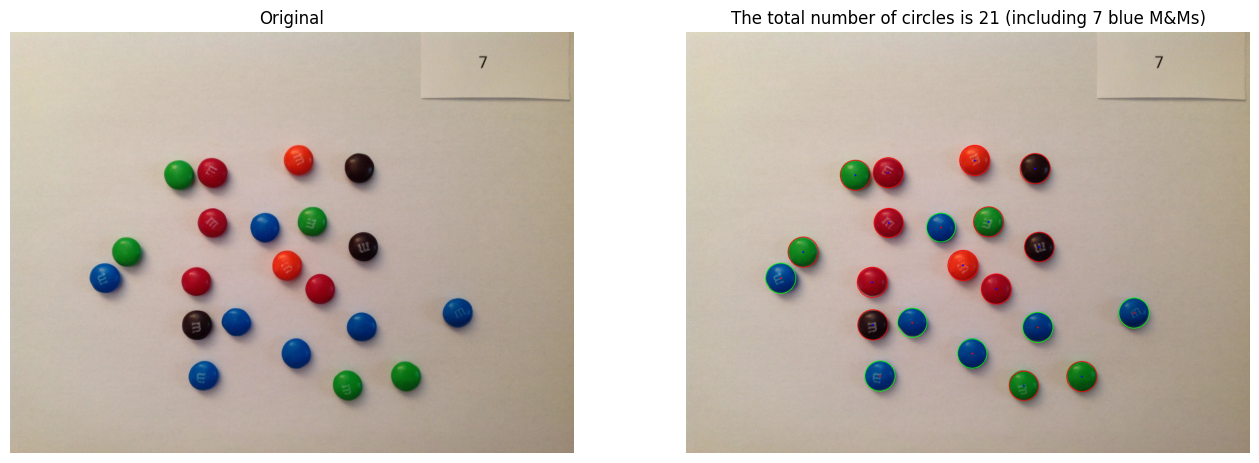

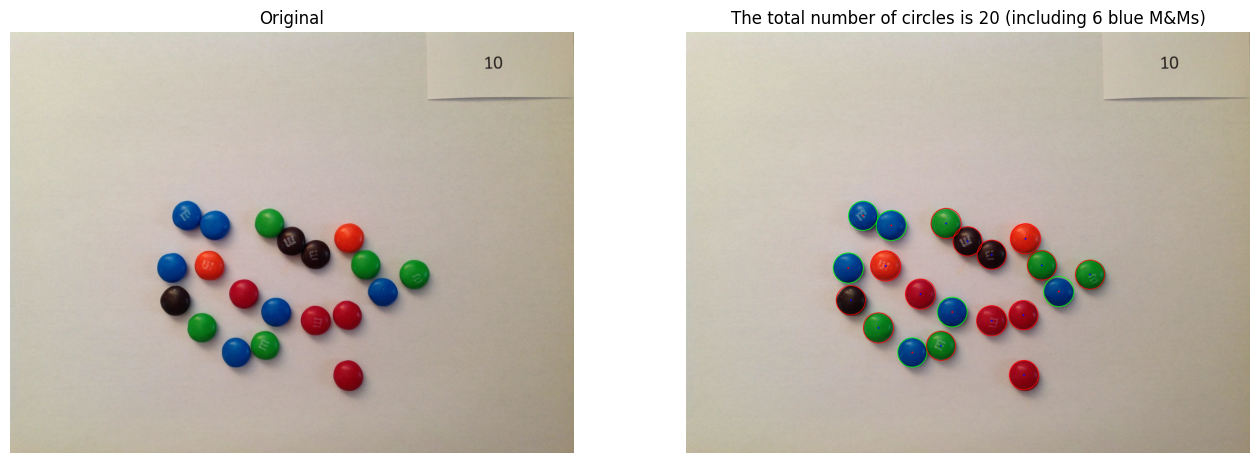

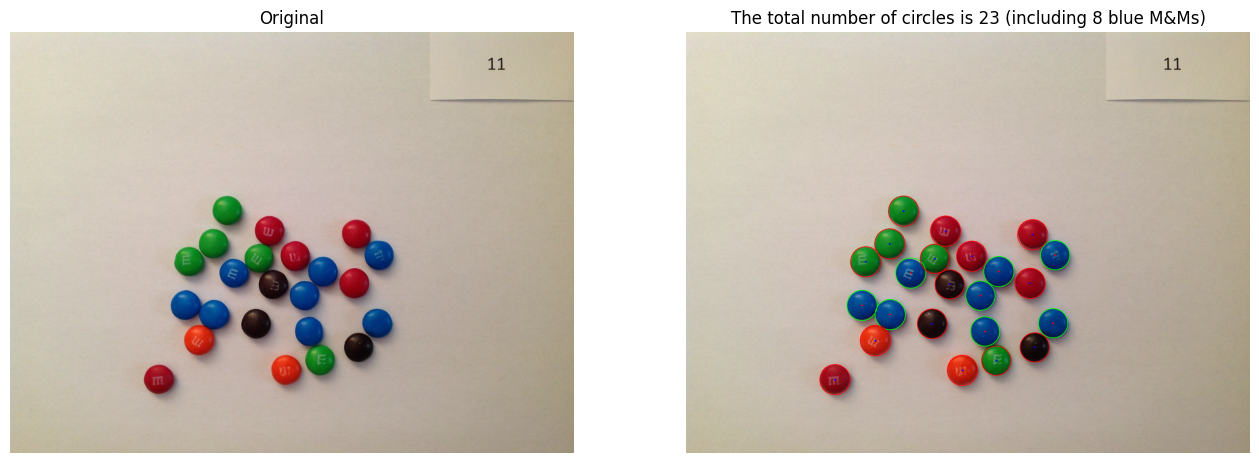

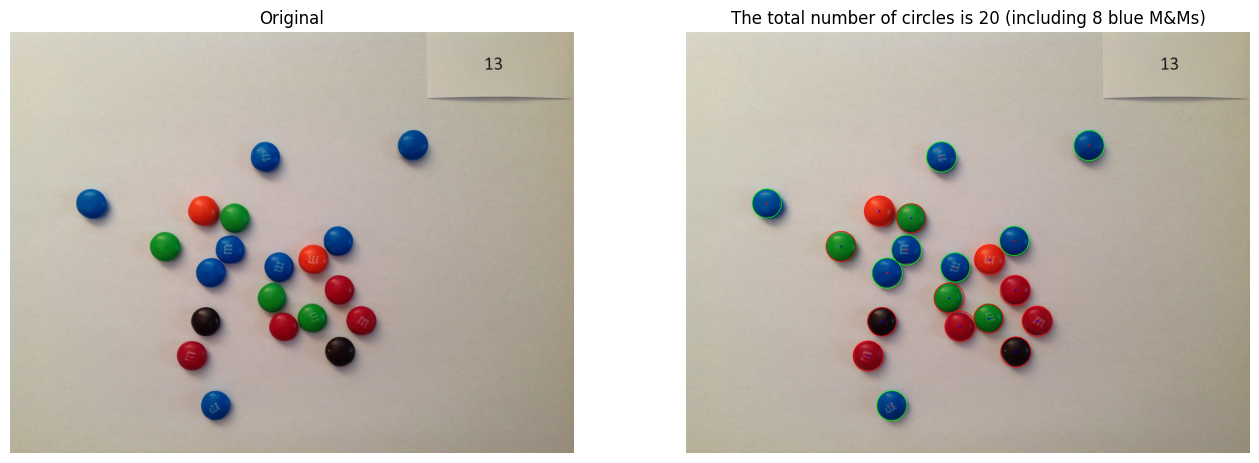

In [30]:
def pair_plot(img1, img2, title1="Original", title2="Filtered"):

    fig = plt.figure(figsize=(16, 16))
    fig.add_subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis("off")
    fig.add_subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis("off")


def find_total(path):
    blue_mnms = 0
    Oraginal_image = cv2.imread(path)
    image = cv2.imread(path)

    if image is None:
        print(f"Error: Unable to load image from the path: {path}")
        return

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred_image = cv2.GaussianBlur(gray_image, (15, 15), 2)

    #use HoughCircles to detect circles in the image
    circles = cv2.HoughCircles(
        blurred_image,
        cv2.HOUGH_GRADIENT,
        dp=2,                 #resolution
        minDist=60,
        param1=26,            #sensetivity to detect the edgys images
        param2=31,            #sensetivity of the whole iamge
        minRadius=56,
        maxRadius=60
    )
    #print (circles)

    #draw circles on the image
    if circles is not None:
        circles = np.uint16(np.around(circles))              #round to the nearest int
        for i in circles[0, :]:                              #array of lists select the row which is list
            center_coordinates = (int(i[0]), int(i[1]))      # X axis , Y axis , Radius

            # Extract BGR color of the specific circle
            bgr_color = image[center_coordinates[1], center_coordinates[0]]
            #print (bgr_color)


            if ( bgr_color[0]>bgr_color[1] and bgr_color[0]>bgr_color[2]):
                # If the color is within the range, draw the circle in green
                cv2.circle(image, center_coordinates, i[2], (0, 255, 0), 2)       #circle
                cv2.circle(image, center_coordinates, 2, (0, 0, 255), 3)          #center
                blue_mnms += 1

            else:
                # If the color is outside the range, draw the circle in red
                cv2.circle(image, center_coordinates, i[2], (0, 0, 255), 2)
                cv2.circle(image, center_coordinates, 2, (255, 0, 0), 3)


#     print(f"The total number of circles is {circles.shape[1]} (including {blue_mnms} blue M&Ms)")
#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.title('M&M Detection')
#     plt.show()

# find_total("Images/0.png")

    pair_plot(Oraginal_image, image, title1="Original", title2=f"The total number of circles is {circles.shape[1]} (including {blue_mnms} blue M&Ms)")


#example usage
Images=["Images/0.png","Images/1.png","Images/2.png","Images/3.png",
        "Images/4.png","Images/5.png","Images/6.png","Images/7.png",
        "Images/8.png","Images/9.png","Images/10.png","Images/11.png",
        "Images/12.png","Images/13.png","Images/14.png"]
for image in Images:
  find_total(image)

